In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/finaldivvy/bq-results-20240717-042041-1721190391637.csv


# Understanding the situation
**This notebook is constructed to answer the question: "How member and casual ride Divvy bikes differently ?" and also provide relevant statistics to backup the findings** 

This dataset has been cleaned, transformed and sampled from GoogleBigQuery. In this notebook, i will do the following activities:
* Understand the data clearly by answering question like: what types is the data, what purpose does it serves,...
* Do univariate analysis, multivariable analysis, transform data in different ways, visuallization, find correlation, hypothesis testing,...etc
* Come up with recommendations from findings

# Understanding the data
**Let's import the data**

In [3]:
df = pd.read_csv("/kaggle/input/finaldivvy/bq-results-20240717-042041-1721190391637.csv")
df.head(10)

/tmp/ipykernel_113/1879097550.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/finaldivvy/bq-results-20240717-042041-1721190391637.csv")


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,ride_length_secs,ride_length_mins,distance_in_kilometers,day_of_week,started_hour
0,5C4AD152F390AFB1,classic_bike,2024-01-10 19:12:26 UTC,2024-01-10 19:25:24 UTC,Clark St & Randolph St,TA1305000030,Racine Ave & Congress Pkwy,TA1306000025,41.884576,-87.631890,41.87464,-87.65703,member,1,778,12,2.356427,Wednesday,19
1,2FF4038A118D01C3,classic_bike,2024-01-28 15:05:09 UTC,2024-01-28 15:12:56 UTC,Desplaines St & Jackson Blvd,15539,Racine Ave & Congress Pkwy,TA1306000025,41.878119,-87.643948,41.87464,-87.65703,member,1,467,7,1.150154,Sunday,15
2,C7EDADC192B75741,classic_bike,2024-01-08 15:33:30 UTC,2024-01-08 15:53:30 UTC,Delano Ct & Roosevelt Rd,KA1706005007,Racine Ave & Congress Pkwy,TA1306000025,41.867491,-87.632190,41.87464,-87.65703,member,1,1200,20,2.205058,Monday,15
3,DBD964B55DF21A7D,classic_bike,2024-01-08 15:34:30 UTC,2024-01-08 15:53:28 UTC,Delano Ct & Roosevelt Rd,KA1706005007,Racine Ave & Congress Pkwy,TA1306000025,41.867491,-87.632190,41.87464,-87.65703,member,1,1138,18,2.205058,Monday,15
4,0E925D5B602875F6,classic_bike,2024-01-26 14:02:31 UTC,2024-01-26 14:15:04 UTC,Delano Ct & Roosevelt Rd,KA1706005007,Racine Ave & Congress Pkwy,TA1306000025,41.867491,-87.632190,41.87464,-87.65703,member,1,753,12,2.205058,Friday,14
5,31F7EA85AADC4BCD,classic_bike,2024-01-24 17:53:10 UTC,2024-01-24 18:16:16 UTC,Wabash Ave & 9th St,TA1309000010,Racine Ave & Congress Pkwy,TA1306000025,41.870769,-87.625734,41.87464,-87.65703,member,1,1386,23,2.626789,Wednesday,17
6,3F3544B13CC0B3E3,classic_bike,2024-01-04 11:23:43 UTC,2024-01-04 11:28:56 UTC,Paulina St & Flournoy St,KA1504000104,Racine Ave & Congress Pkwy,TA1306000025,41.873061,-87.669135,41.87464,-87.65703,member,1,313,5,1.017517,Thursday,11
7,9C8EA4C67DF21DE1,classic_bike,2024-01-31 17:26:18 UTC,2024-01-31 17:31:36 UTC,Paulina St & Flournoy St,KA1504000104,Racine Ave & Congress Pkwy,TA1306000025,41.873061,-87.669135,41.87464,-87.65703,member,1,318,5,1.017517,Wednesday,17
8,333AD9D07161322F,classic_bike,2024-01-30 18:07:47 UTC,2024-01-30 18:14:11 UTC,Paulina St & Flournoy St,KA1504000104,Racine Ave & Congress Pkwy,TA1306000025,41.873061,-87.669135,41.87464,-87.65703,member,1,384,6,1.017517,Tuesday,18
9,C6EB8E51BAB4E40A,classic_bike,2024-01-25 17:26:02 UTC,2024-01-25 17:39:21 UTC,Desplaines St & Jackson Blvd,15539,Racine Ave & Congress Pkwy,TA1306000025,41.878119,-87.643948,41.87464,-87.65703,casual,1,799,13,1.150154,Thursday,17


**Looking at the few first rows, i have a few observations:**
* Each rows seem to represent a time where customers uses a Divvy Bike
* Customer can choose from electric_bike or classic_bike
* Each rows also have location of start point and endpoint as well as the time
* Each rides have an unique id
* Each station have an unique id

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668722 entries, 0 to 668721
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ride_id                 668722 non-null  object 
 1   rideable_type           668722 non-null  object 
 2   started_at              668722 non-null  object 
 3   ended_at                668722 non-null  object 
 4   start_station_name      581884 non-null  object 
 5   start_station_id        581884 non-null  object 
 6   end_station_name        576684 non-null  object 
 7   end_station_id          576684 non-null  object 
 8   start_lat               668722 non-null  float64
 9   start_lng               668722 non-null  float64
 10  end_lat                 668722 non-null  float64
 11  end_lng                 668722 non-null  float64
 12  member_casual           668722 non-null  object 
 13  month                   668722 non-null  int64  
 14  ride_length_secs    

**Looking at the info table:**
* The name and id seem to have some null values that were missing. Since it would not affect the result in our question i will ignore it
* The dataset have 10 thousands observations as expected
* The type of each columns seems odd as started_at, ended_at and ride_length should be date_time so we will change it back

In [5]:
df['started_at']=pd.to_datetime(df['started_at'])
df['ended_at']=pd.to_datetime(df['ended_at'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668722 entries, 0 to 668721
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   ride_id                 668722 non-null  object             
 1   rideable_type           668722 non-null  object             
 2   started_at              668722 non-null  datetime64[ns, UTC]
 3   ended_at                668722 non-null  datetime64[ns, UTC]
 4   start_station_name      581884 non-null  object             
 5   start_station_id        581884 non-null  object             
 6   end_station_name        576684 non-null  object             
 7   end_station_id          576684 non-null  object             
 8   start_lat               668722 non-null  float64            
 9   start_lng               668722 non-null  float64            
 10  end_lat                 668722 non-null  float64            
 11  end_lng                 66

**As can be seen we have successfully change it back to datetime**

In [7]:
df.describe()

,start_lat,start_lng,end_lat,end_lng,month,ride_length_secs,ride_length_mins,distance_in_kilometers,started_hour
count,668722.000000,668722.000000,668722.000000,668722.000000,668722.000000,668722.000000,668722.000000,668722.000000,668722.000000
mean,41.899286,-87.646908,41.899570,-87.647032,2.234337,791.495584,12.703267,1.890240,13.721573
std,0.047142,0.027405,0.047261,0.027491,0.782206,2259.494942,37.656501,1.734732,4.702697
min,41.648501,-87.844110,41.630000,-87.870000,1.000000,-2617.000000,-43.000000,0.000000,0.000000
25%,41.879569,-87.660984,41.880000,-87.661198,2.000000,289.000000,4.000000,0.824857,10.000000
50%,41.894733,-87.643819,41.895501,-87.643948,2.000000,487.000000,8.000000,1.381710,14.000000
75%,41.928773,-87.630000,41.928887,-87.630000,3.000000,843.000000,14.000000,2.401104,17.000000
max,42.070000,-87.528232,42.080000,-87.460000,3.000000,90562.000000,1509.000000,31.124978,23.000000


**From the description table:**
* Longitude and latitude seems to be distributed correctly in the area of 41 and -87 as we are in Chicago
* Month seems to be correct with January, Febuary, March
* Distance seems rather normal with mean of around 2 km but riding a bikes for 18 km is a bit extreme so we will have to look into that
* Ride_length is also peculiar as the maximum is one day and the minimum is minus one day which frankly makes no sense when riding a bike

# Investigate the variable
**As what we are doing is trying to answer the question differentiating between member and casual riders and try to classify types of user let's first focus on member_casual:**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='member_casual', ylabel='Count'>

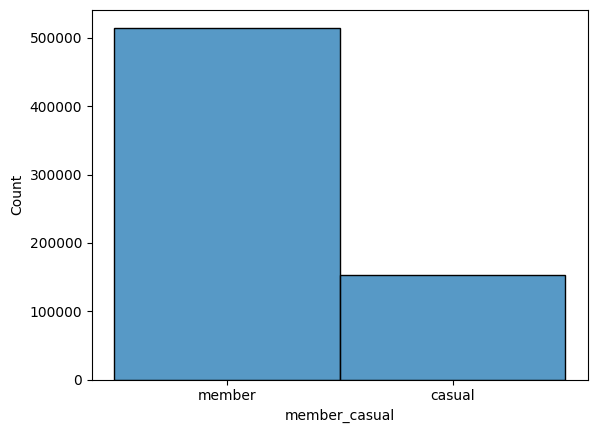

In [8]:
sns.histplot(x=df['member_casual'])

**As can be seen:**
* There are 2 types of riders: member and casual
* The number of riders is significantly higher than casual riders almost triple

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='member_casual', ylabel='Count'>

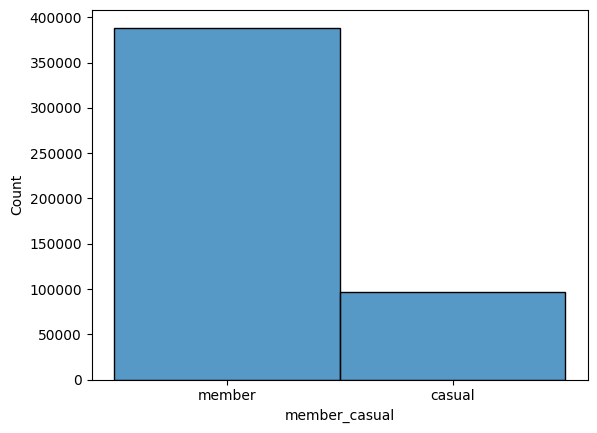

In [9]:
below_mean_rider = df[df['ride_length_secs']<= np.mean(df['ride_length_secs'])]
sns.histplot(x=below_mean_rider['member_casual'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='member_casual', ylabel='Count'>

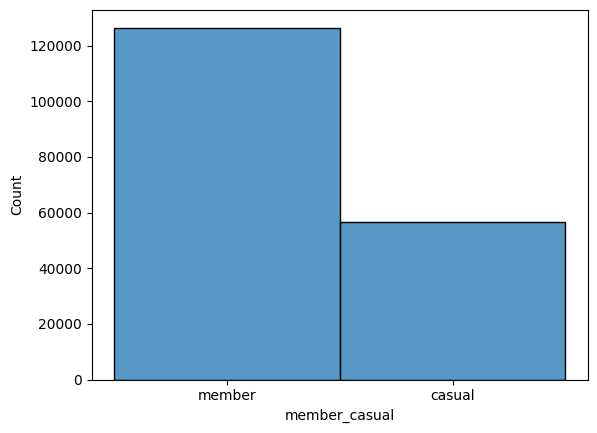

In [10]:
above_mean_rider = df[df['ride_length_secs']> np.mean(df['ride_length_secs'])]
sns.histplot(x=above_mean_rider['member_casual'])

In [11]:
ratioa = len(above_mean_rider[above_mean_rider['member_casual']=='casual'])/len(df[df['member_casual']=='casual'])
print('The percentage of casual rider riding above mean ride length:',ratioa*100,'%')

The percentage of casual rider riding above mean ride length: 36.86516824669236 %


In [12]:
ratiob = len(above_mean_rider[above_mean_rider['member_casual']=='member'])/len(df[df['member_casual']=='member'])
print('The percentage of member rider riding above mean ride length:',ratiob*100,'%')

The percentage of member rider riding above mean ride length: 24.554003005020014 %


**From graphs and calculations, it is reasonable to conclude:**
* Casual riders likes to ride for longer length of time than member riders
* The ration between member and rider are too high so using average and sum would not generate accurate insights

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

([<matplotlib.axis.XTick at 0x792df6bb3a90>,
 [Text(1, 0, 'January'), Text(2, 0, 'February'), Text(3, 0, 'March')])

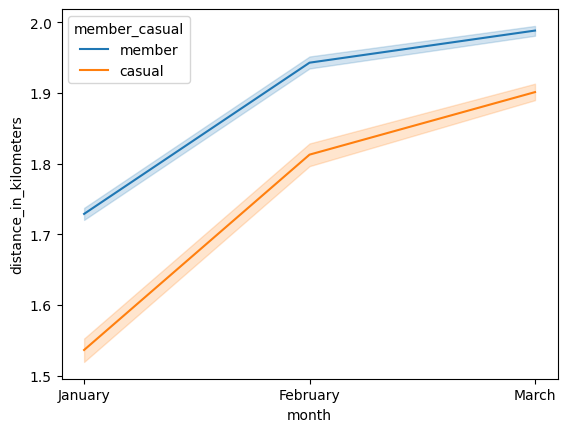

In [13]:
sns.lineplot(x=df['month'],y=df['distance_in_kilometers'],hue=df['member_casual'])
plt.xticks([1, 2, 3], ['January', 'February', 'March']) 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

([<matplotlib.axis.XTick at 0x792df6a7a9e0>,
 [Text(1, 0, 'January'), Text(2, 0, 'February'), Text(3, 0, 'March')])

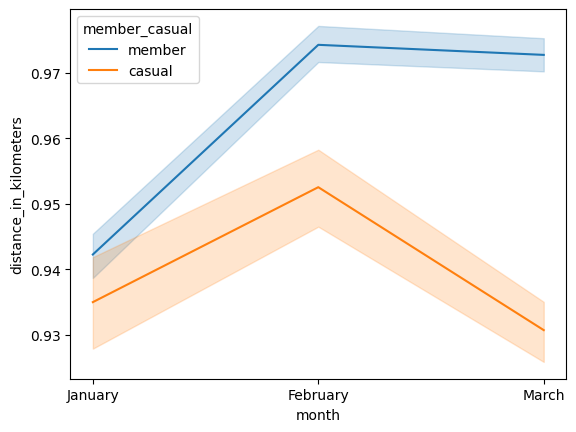

In [14]:
below_mean_distance = df[df['distance_in_kilometers']<= np.mean(df['distance_in_kilometers'])]
sns.lineplot(x=below_mean_distance['month'],y=below_mean_distance['distance_in_kilometers'],hue=below_mean_distance['member_casual'])
plt.xticks([1, 2, 3], ['January', 'February', 'March']) 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

([<matplotlib.axis.XTick at 0x792dd5953b80>,
 [Text(1, 0, 'January'), Text(2, 0, 'February'), Text(3, 0, 'March')])

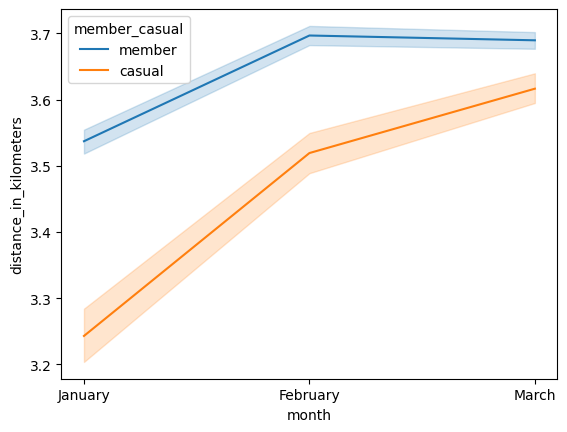

In [15]:
above_mean_distance = df[df['distance_in_kilometers']> np.mean(df['distance_in_kilometers'])]
sns.lineplot(x=above_mean_distance['month'],y=above_mean_distance['distance_in_kilometers'],hue=above_mean_distance['member_casual'])
plt.xticks([1, 2, 3], ['January', 'February', 'March']) 

In [16]:
ratioa = len(above_mean_distance[above_mean_distance['member_casual']=='casual'])/len(df[df['member_casual']=='casual'])
print('The percentage of casual rider riding above mean distance:',ratioa*100,'%')

The percentage of casual rider riding above mean distance: 33.73788936347536 %


In [17]:
ratiob = len(above_mean_distance[above_mean_distance['member_casual']=='member'])/len(df[df['member_casual']=='member'])
print('The percentage of member rider riding above mean distance:',ratiob*100,'%')

The percentage of member rider riding above mean distance: 35.116221284393696 %


**Looking at the line plot and calculations it is easily spotted:**
* Casual and members does not have much difference when it comes to distance ride
* This could mean that the speed at which casual riders ride might be slower than member rider

<Axes: xlabel='count', ylabel='month'>

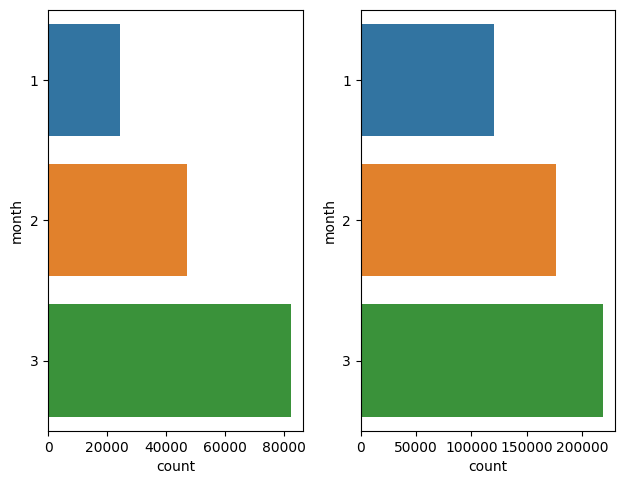

In [18]:
casual_df = df[df['member_casual']=='casual']
member_df = df[df['member_casual']=='member']
import matplotlib.pyplot as plt

# Creating subplot axes
fig, axes = plt.subplots(1,2)
plt.tight_layout()
# Iterating through axes and names
sns.countplot(y=casual_df['month'], ax=axes[0])
sns.countplot(y=member_df['month'], ax=axes[1])

<Axes: xlabel='count', ylabel='day_of_week'>

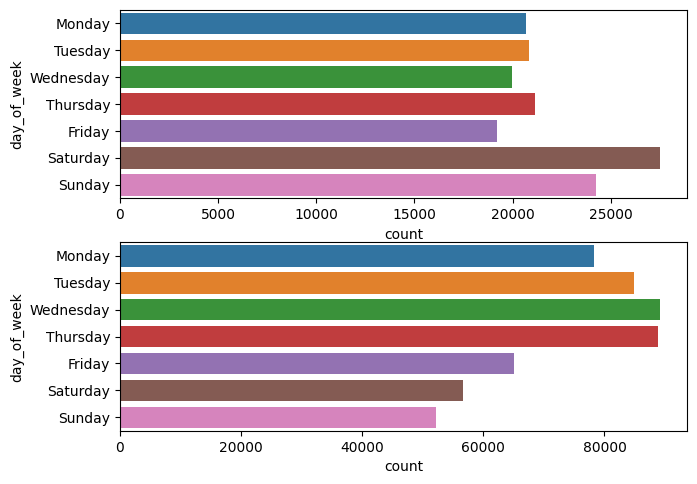

In [19]:
# Creating subplot axes
fig, axes = plt.subplots(2,1)
plt.tight_layout()
# Iterating through axes and names
sns.countplot(y=casual_df['day_of_week'], order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ax=axes[0])
sns.countplot(y=member_df['day_of_week'], order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ax=axes[1])

<Axes: xlabel='ride_length_secs', ylabel='day_of_week'>

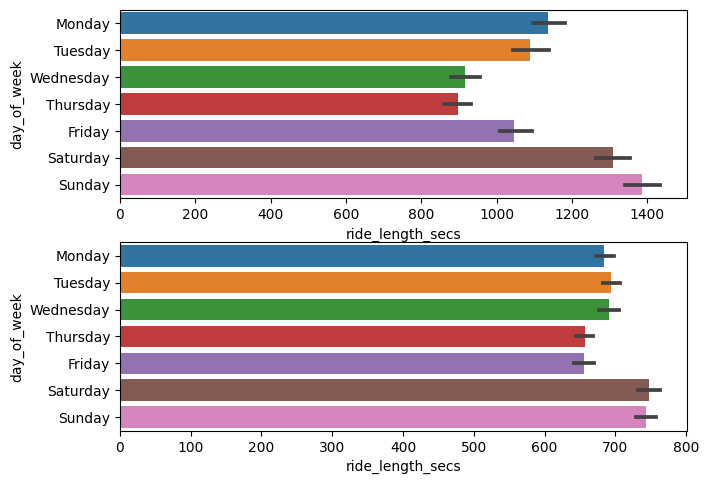

In [20]:
# Creating subplot axes
fig, axes = plt.subplots(2,1)
plt.tight_layout()
# Iterating through axes and names
sns.barplot(x=df['ride_length_secs'],y=casual_df['day_of_week'], order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ax=axes[0])
sns.barplot(x=df['ride_length_secs'],y=member_df['day_of_week'], order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ax=axes[1])

**From the above tables, we can conclude:**
* Casual riders like riding on the weekends
* Member riders seem to prefer the weekdays

<Axes: xlabel='rideable_type', ylabel='count'>

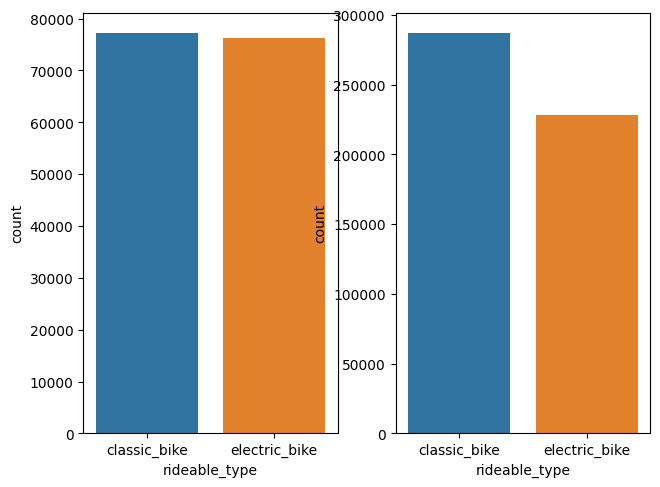

In [21]:
# Creating subplot axes
fig, axes = plt.subplots(1,2)
plt.tight_layout()
# Iterating through axes and names
sns.countplot(x=casual_df['rideable_type'], ax=axes[0])
sns.countplot(x=member_df['rideable_type'], ax=axes[1])

**It also seems like:**
* Casual riders used classic bikes and electric bikes equally
* Members riders prefered classic bikes

<Axes: xlabel='started_hour', ylabel='ride_length_secs'>

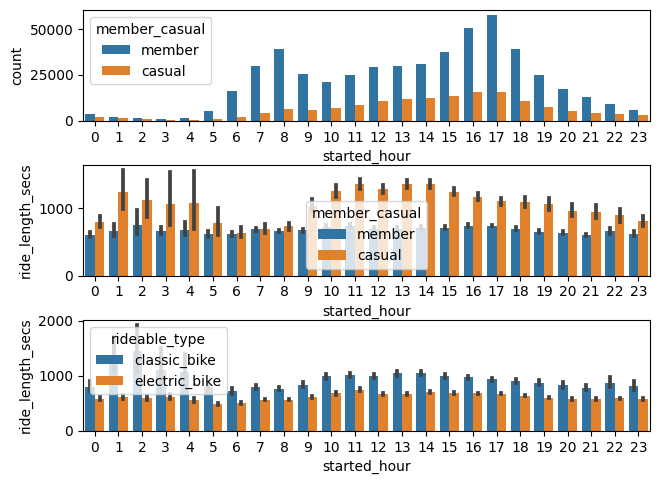

In [22]:
# Creating subplot axes
fig, axes = plt.subplots(3,1)
plt.tight_layout()
# Iterating through axes and names
sns.countplot(x=df['started_hour'], hue=df['member_casual'], ax=axes[0])
sns.barplot(y=df['ride_length_secs'],x=df['started_hour'], hue=df['member_casual'], ax=axes[1])
sns.barplot(y=df['ride_length_secs'],x=df['started_hour'], hue=df['rideable_type'], ax=axes[2])

**Conclusions:**
* Member seems to enjoy morning rides and evening rides
* Casual only enjoys afternoon rides especially from 16-17 which is when most people got off work
* This also reinforce classic bikes are more popular

In [23]:
# Top 10 average duration by type of bike from-to station
dfg = pd.DataFrame(df.groupby(['rideable_type','member_casual','start_station_name','end_station_name', 'started_hour'])['ride_length_mins'].mean().nlargest(10).sort_values(ascending=False).reset_index())
dfg.columns=['rideable_type','member_casual','start_station_name','end_station_name', 'started_rent(hour)', 'average_duration_trip']
dfg

,rideable_type,member_casual,start_station_name,end_station_name,started_rent(hour),average_duration_trip
0,classic_bike,member,Lincoln Ave & Addison St,Clark St & Winnemac Ave,9,1481.0
1,classic_bike,casual,McClurg Ct & Ohio St,Clark St & Lincoln Ave,18,1478.0
2,classic_bike,member,Lincoln Ave & Waveland Ave,Lincoln Ave & Roscoe St*,9,1472.0
3,classic_bike,member,DuSable Lake Shore Dr & Monroe St,McClurg Ct & Erie St,16,1467.0
4,classic_bike,member,Aberdeen St & Jackson Blvd,Delano Ct & Roosevelt Rd,18,1462.0
5,classic_bike,member,State St & 33rd St,Shields Ave & 28th Pl,13,1460.0
6,classic_bike,casual,Halsted St & Fulton St,Franklin St & Illinois St,16,1453.0
7,classic_bike,casual,Clark St & Armitage Ave,Sedgwick St & Webster Ave,13,1450.0
8,classic_bike,member,Kingsbury St & Kinzie St,Clark St & Elm St,15,1437.0
9,classic_bike,casual,Delano Ct & Roosevelt Rd,Dearborn St & Van Buren St,15,1429.0


In [24]:
#import plotly.express as px
#import pandas as pd
#color_scale = [(0, 'orange'), (1,'red')]

#fig = px.scatter_mapbox(df, 
                        #lat="start_lat", 
                        #lon="start_lng", 
                        #hover_name="ride_id", 
                        #hover_data=["start_station_name", "start_station_id"],
                        #color="member_casual",
                        #color_continuous_scale=color_scale,
                        #size="distance_in_kilometers",
                        #zoom=8, 
                        #height=800,
                        #width=800)

#fig.update_layout(mapbox_style="open-street-map")
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#fig.show()

In [25]:
#import plotly.express as px
#import pandas as pd
#color_scale = [(0, 'orange'), (1,'red')]

#fig = px.scatter_mapbox(df, 
                        #lat="end_lat", 
                        #lon="end_lng", 
                        #hover_name="ride_id", 
                        #hover_data=["end_station_name", "end_station_id"],
                        #color="member_casual",
                        #color_continuous_scale=color_scale,
                        #size="distance_in_kilometers",
                        #zoom=8, 
                        #height=800,
                        #width=800)

#fig.update_layout(mapbox_style="open-street-map")
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#fig.show()

# Preprocess the data
**Let's start by finding missing values**

In [26]:
df.isnull().sum()

ride_id                       0
rideable_type                 0
started_at                    0
ended_at                      0
start_station_name        86838
start_station_id          86838
end_station_name          92038
end_station_id            92038
start_lat                     0
start_lng                     0
end_lat                       0
end_lng                       0
member_casual                 0
month                         0
ride_length_secs              0
ride_length_mins              0
distance_in_kilometers        0
day_of_week                   0
started_hour                  0
dtype: int64

**Looking at the number of blank values:**
* As stated above, the null values might be a result of user or the system so imputation would not be probable
* I will proceed to drop them for a smooth model training

In [27]:
new_df = df.dropna()
new_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,ride_length_secs,ride_length_mins,distance_in_kilometers,day_of_week,started_hour
0,5C4AD152F390AFB1,classic_bike,2024-01-10 19:12:26+00:00,2024-01-10 19:25:24+00:00,Clark St & Randolph St,TA1305000030,Racine Ave & Congress Pkwy,TA1306000025,41.884576,-87.631890,41.87464,-87.65703,member,1,778,12,2.356427,Wednesday,19
1,2FF4038A118D01C3,classic_bike,2024-01-28 15:05:09+00:00,2024-01-28 15:12:56+00:00,Desplaines St & Jackson Blvd,15539,Racine Ave & Congress Pkwy,TA1306000025,41.878119,-87.643948,41.87464,-87.65703,member,1,467,7,1.150154,Sunday,15
2,C7EDADC192B75741,classic_bike,2024-01-08 15:33:30+00:00,2024-01-08 15:53:30+00:00,Delano Ct & Roosevelt Rd,KA1706005007,Racine Ave & Congress Pkwy,TA1306000025,41.867491,-87.632190,41.87464,-87.65703,member,1,1200,20,2.205058,Monday,15
3,DBD964B55DF21A7D,classic_bike,2024-01-08 15:34:30+00:00,2024-01-08 15:53:28+00:00,Delano Ct & Roosevelt Rd,KA1706005007,Racine Ave & Congress Pkwy,TA1306000025,41.867491,-87.632190,41.87464,-87.65703,member,1,1138,18,2.205058,Monday,15
4,0E925D5B602875F6,classic_bike,2024-01-26 14:02:31+00:00,2024-01-26 14:15:04+00:00,Delano Ct & Roosevelt Rd,KA1706005007,Racine Ave & Congress Pkwy,TA1306000025,41.867491,-87.632190,41.87464,-87.65703,member,1,753,12,2.205058,Friday,14


In [28]:
new_df.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name        0
start_station_id          0
end_station_name          0
end_station_id            0
start_lat                 0
start_lng                 0
end_lat                   0
end_lng                   0
member_casual             0
month                     0
ride_length_secs          0
ride_length_mins          0
distance_in_kilometers    0
day_of_week               0
started_hour              0
dtype: int64

**There are no more null to be found let's move on to outliers**

In [29]:
new_df.describe()

,start_lat,start_lng,end_lat,end_lng,month,ride_length_secs,ride_length_mins,distance_in_kilometers,started_hour
count,528822.000000,528822.000000,528822.000000,528822.000000,528822.000000,528822.000000,528822.000000,528822.000000,528822.000000
mean,41.897086,-87.644778,41.897403,-87.644909,2.220244,811.978948,13.043313,1.859197,13.668062
std,0.045827,0.025755,0.045939,0.025802,0.775989,2215.978537,36.933579,1.689093,4.637445
min,41.648501,-87.844110,41.648501,-87.843960,1.000000,-2.000000,0.000000,0.000000,0.000000
25%,41.878317,-87.658617,41.879255,-87.658617,2.000000,298.000000,4.000000,0.810751,10.000000
50%,41.893808,-87.641697,41.893992,-87.641697,2.000000,501.000000,8.000000,1.357750,14.000000
75%,41.924161,-87.629430,41.924816,-87.629521,3.000000,866.000000,14.000000,2.358758,17.000000
max,42.064854,-87.528232,42.064854,-87.528232,3.000000,90562.000000,1509.000000,30.378686,23.000000


**Looking at the table:**
* The distance columns have a mean of 1.88 but the max value is 30 which is almost 30 times higher and it is unusual for someone to ride 30km
* Ride length wise the mean is 13 minutes but the min values is 0 which is definitely wrong

<Axes: xlabel='ride_length_secs'>

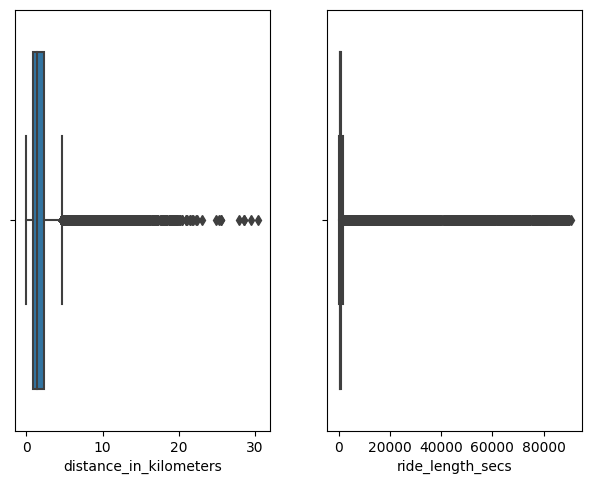

In [30]:
# Creating subplot axes
fig, axes = plt.subplots(1,2)
plt.tight_layout()
# Iterating through axes and names
sns.boxplot(x=new_df['distance_in_kilometers'], hue=df['member_casual'], ax=axes[0])
sns.boxplot(x=new_df['ride_length_secs'], hue=df['member_casual'], ax=axes[1])

**Looking at the 2 box plot:**
* We have a lot more outliers than expected
* It seems that most of them are collective outliers

<Axes: xlabel='distance_in_kilometers', ylabel='ride_length_secs'>

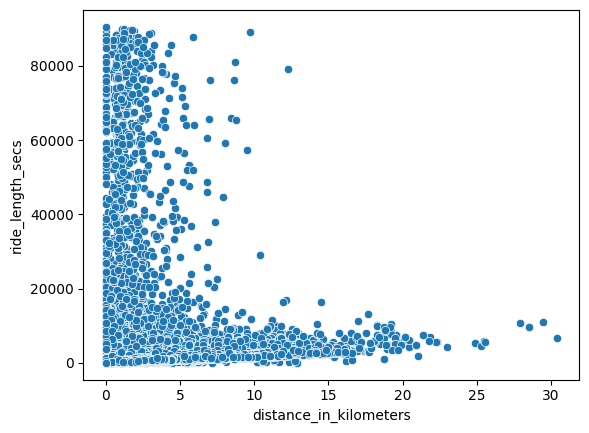

In [31]:
sns.scatterplot(x=new_df['distance_in_kilometers'],y=new_df['ride_length_secs'])

**From the graph above:**
* Distance and ride length have very slight correlation
* It is not realistic spending more than 10000 seconds to ride less than 10 km and only 1000 seconds to ride more than 10 km but this need further investigation and i dont have the data to investigate them as i can not take into consideration user mistake for not returning bike or what they do when they stop riding bikes to do another thing.

In [32]:
from sklearn import preprocessing 

final_df = new_df
label_encoder = preprocessing.LabelEncoder() 

final_df['member_casual']= label_encoder.fit_transform(new_df['member_casual']) 
final_df['day_of_week']= label_encoder.fit_transform(new_df['day_of_week']) 
final_df['rideable_type']= label_encoder.fit_transform(new_df['rideable_type']) 
final_df.head()

/tmp/ipykernel_113/3782406369.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['member_casual']= label_encoder.fit_transform(new_df['member_casual'])
/tmp/ipykernel_113/3782406369.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['day_of_week']= label_encoder.fit_transform(new_df['day_of_week'])
/tmp/ipykernel_113/3782406369.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,ride_length_secs,ride_length_mins,distance_in_kilometers,day_of_week,started_hour
0,5C4AD152F390AFB1,0,2024-01-10 19:12:26+00:00,2024-01-10 19:25:24+00:00,Clark St & Randolph St,TA1305000030,Racine Ave & Congress Pkwy,TA1306000025,41.884576,-87.631890,41.87464,-87.65703,1,1,778,12,2.356427,6,19
1,2FF4038A118D01C3,0,2024-01-28 15:05:09+00:00,2024-01-28 15:12:56+00:00,Desplaines St & Jackson Blvd,15539,Racine Ave & Congress Pkwy,TA1306000025,41.878119,-87.643948,41.87464,-87.65703,1,1,467,7,1.150154,3,15
2,C7EDADC192B75741,0,2024-01-08 15:33:30+00:00,2024-01-08 15:53:30+00:00,Delano Ct & Roosevelt Rd,KA1706005007,Racine Ave & Congress Pkwy,TA1306000025,41.867491,-87.632190,41.87464,-87.65703,1,1,1200,20,2.205058,1,15
3,DBD964B55DF21A7D,0,2024-01-08 15:34:30+00:00,2024-01-08 15:53:28+00:00,Delano Ct & Roosevelt Rd,KA1706005007,Racine Ave & Congress Pkwy,TA1306000025,41.867491,-87.632190,41.87464,-87.65703,1,1,1138,18,2.205058,1,15
4,0E925D5B602875F6,0,2024-01-26 14:02:31+00:00,2024-01-26 14:15:04+00:00,Delano Ct & Roosevelt Rd,KA1706005007,Racine Ave & Congress Pkwy,TA1306000025,41.867491,-87.632190,41.87464,-87.65703,1,1,753,12,2.205058,0,14


In [34]:
h_df = final_df.loc[:,'start_lat':'started_hour']

h_df.head()

,start_lat,start_lng,end_lat,end_lng,member_casual,month,ride_length_secs,ride_length_mins,distance_in_kilometers,day_of_week,started_hour
0,41.884576,-87.631890,41.87464,-87.65703,1,1,778,12,2.356427,6,19
1,41.878119,-87.643948,41.87464,-87.65703,1,1,467,7,1.150154,3,15
2,41.867491,-87.632190,41.87464,-87.65703,1,1,1200,20,2.205058,1,15
3,41.867491,-87.632190,41.87464,-87.65703,1,1,1138,18,2.205058,1,15
4,41.867491,-87.632190,41.87464,-87.65703,1,1,753,12,2.205058,0,14


<Axes: >

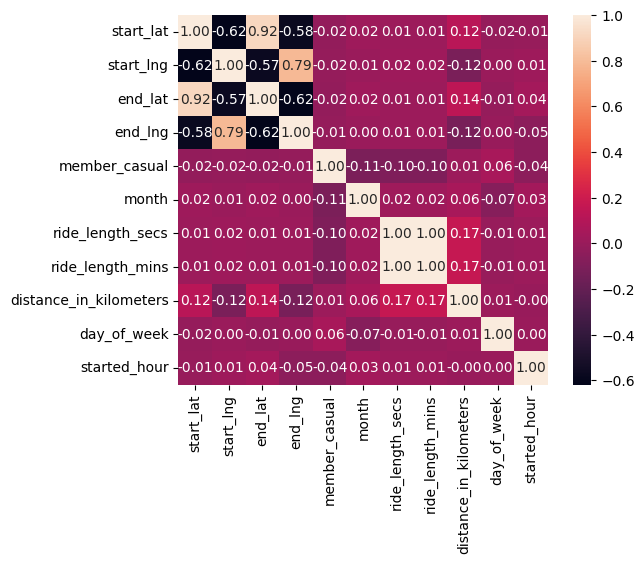

In [36]:
sns.heatmap(data=h_df.corr(),square=True,annot=True, fmt='.2f')

**It seems that there are no correlation whatsoever between these variables based on the numbers**